In [1]:
import gym
import numpy as np
from tqdm import tqdm
from nstep_sarsa_off_policy import run_nstep_sarsa_offPolicy, run_nstep_sarsa_offPolicy_control_variate, run_nstep_sarsa_offPolicy_steps, run_nstep_sarsa_offPolicy_control_variate_steps
from nstep_sarsa import run_nstep_sarsa, run_nstep_sarsa_step
from wrappers import DiscreteObservationWrapper
from plot_graph import moving_mean_plot, save_results, load_results, moving_mean_plot_many

### SARSA off-policy n-steps

In [4]:
# Melhores parâmetros para o sarsa off-policy

ENV_NAME = "Taxi-v3"
LR = 0.9270333877099305
GAMMA =  0.410373207108165
EPSILON = 1
NSTEPS = 1
STEPS = 200_000

env = gym.make(ENV_NAME)

In [ ]:
results_offpolicy = []
for execution in tqdm(range(5)):
    all_return = run_nstep_sarsa_offPolicy_steps(env, STEPS, NSTEPS, LR, GAMMA, EPSILON)
    results_offpolicy.append(all_return)

In [ ]:
results_offpolicy = np.array(results_offpolicy)

In [ ]:
for i in range(1000, 1_000_001, 100_000):
    moving_mean_plot(results_offpolicy, 1_000_000, i, 1)

### SARSA off-policy n-steps control variate

In [ ]:
# Melhores parâmetros para o sarsa off-policy control variate

ENV_NAME = "Taxi-v3"
LR = 0.7189589015195631
GAMMA =  0.6217420646884909
EPSILON = 1
NSTEPS = 11
STEPS = 200_000

env = gym.make(ENV_NAME)

### Resultados

In [3]:
# off-policy X on-policy
# taxi_offpolicy = load_results("taxi-1.npy")
taxi_onpolicy = load_results("taxi-0-1.npy")
taxi_offpolicy_cv = load_results("taxi-2.npy")
taxi_onpolicy_cv = load_results("taxi-0-2.npy")

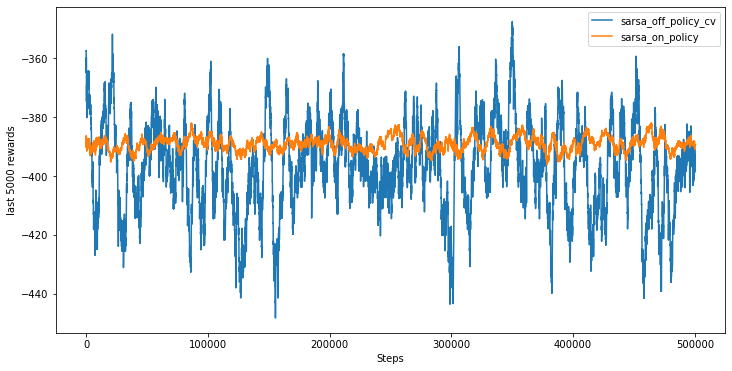

In [5]:
moving_mean_plot_many([taxi_offpolicy_cv.mean(axis=0), taxi_onpolicy_cv.mean(axis=0)], ['sarsa_off_policy_cv', 'sarsa_on_policy'], 500_000, 5000)